In [1]:
import pandas as pd
import numpy as np
import datetime
import pickle
from matplotlib import pyplot as plt

from IPython.display import display

#set pandas to display
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 20)

# load data

In [2]:
df = pd.read_pickle("data.pkl")

# PCA

In [3]:
for name in df.columns:
    if "XAU" in name.upper():
        print(name)

XAU Curncy


In [4]:
ticker_mapper = pd.read_csv("ticker_map.csv")
ticker_mapper.set_index("Symbol Name", inplace=True, drop=True)
ticker_mapper = ticker_mapper["Description"].to_dict()
ticker_mapper

{'BO1 Comdty': 'Soybean Oil',
 'C 1 Comdty': 'Corn',
 'CC1 Comdty': 'Cocoa',
 'CT1 Comdty': 'Cotton',
 'FC1 Comdty': 'Feeder Cattle',
 'JN1 Comdty': 'Rubber',
 'JO1 Comdty': 'Orange Juice',
 'KC1 Comdty': 'Coffee',
 'LB1 Comdty': 'Lumber',
 'LC1 Comdty': 'Live Cattle',
 'LH1 Comdty': 'Lean Hogs',
 'O 1 Comdty': 'Oats',
 'QW1 Comdty': 'Sugar',
 'RR1 Comdty': 'Rough Rice',
 'S 1 Comdty': 'Soybeans',
 'SM1 Comdty': 'Soybean Meal',
 'W 1 Comdty': 'Wheat',
 'HG1 Comdty': 'Copper',
 'LL1 Comdty': 'Lead',
 'LN1 Comdty': 'Nickle',
 'LT1 Comdty': 'Tin',
 'LA1 Comdty': 'Aluminum',
 'MOODCA Index': 'Moody Corporate Bond Index A',
 'MOODCAA Index': 'Moody Corporate Bond Index Aa',
 'MOODCAAA Index': 'Moody Corporate Bond Index Aaa',
 'MOODCBAA Index': 'Moody Corporate Bond Index Baa',
 'BAHYTRUU Index': 'Barclays Asia High Yield Bond Index USD',
 'LEGATRUU Index': 'Barclays Global Aggregate Index',
 'LG30TRUU Index': 'Barclays Global High Yield Index',
 'CL1 Comdty': 'WTI Crude',
 'CO1 Comdty': 'B

In [5]:
df.columns = [ticker_mapper[name] for name in df.columns]

In [6]:
df

,Soybean Oil,Corn,Cocoa,Cotton,Feeder Cattle,Rubber,Orange Juice,Coffee,Lumber,Live Cattle,...,Bloomberg Barclays Series-E Japan Govt All > 1 Yr Bond Index,Bloomberg Barclays Series-E Netherlands Govt All > 1 Yr Bond Index,Bloomberg Barclays Series-E New Zealand Govt All > 1 Yr Bond Index,Bloomberg Barclays Series-E Norway Govt All > 1 Yr Bond Index,Bloomberg Barclays Series-E Portugal Govt All > 1 Yr Bond Index,Bloomberg Barclays Series-E UK Govt All > 1 Yr Bond Index,Bloomberg Barclays Series-E Spain Govt All > 1 Yr Bond Index,Bloomberg Barclays Series-E Switzerland Govt All > 1 Yr Bond Index,Bloomberg Barclays Series-E Switzerland Govt All > 1 Yr Bond Index,Bloomberg Barclays Series-E US Govt All > 1 Yr Bond Index
date,,,,,,,,,,,,,,,,,,,,,
1973-09-11,23.5,251.5,1383,85,57.3,NaN,48.1,59.8,NaN,46.15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1973-09-12,22.7,241.5,1400,83,58.3,NaN,47.5,60.65,NaN,46.05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1973-09-13,23.2,243,1448,83,58.25,NaN,48,61.75,NaN,45.675,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1973-09-14,22.85,252.5,1493,85,58.25,NaN,48.4,61.95,NaN,44.825,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1973-09-17,22.8,262.5,1537,87,57.9,NaN,48.4,62.3,NaN,43.825,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-05,66,471,3560,88,251.375,229,332.15,151.4,344,179.95,...,221.6389,382.46,568.8941,429.8234,505.31,517.3578,575.716,240.294,443.4346,382.8286
2023-09-06,65.35,471.5,3577,86,253.15,229.8,346.15,151.75,344,182.7,...,221.779,381.31,568.0599,429.543,503.53,516.6697,573.8862,239.494,442.6431,382.3176
2023-09-07,63.86,470.75,3573,83.62,255.575,227.1,350.95,147.4,344,183.65,...,221.6757,382.19,568.3697,429.2656,504.94,519.3097,575.6524,238.855,442.5685,383.1561


In [7]:
# change daily price to pct returns
df = df.bfill().pct_change().dropna()
df

,Soybean Oil,Corn,Cocoa,Cotton,Feeder Cattle,Rubber,Orange Juice,Coffee,Lumber,Live Cattle,...,Bloomberg Barclays Series-E Japan Govt All > 1 Yr Bond Index,Bloomberg Barclays Series-E Netherlands Govt All > 1 Yr Bond Index,Bloomberg Barclays Series-E New Zealand Govt All > 1 Yr Bond Index,Bloomberg Barclays Series-E Norway Govt All > 1 Yr Bond Index,Bloomberg Barclays Series-E Portugal Govt All > 1 Yr Bond Index,Bloomberg Barclays Series-E UK Govt All > 1 Yr Bond Index,Bloomberg Barclays Series-E Spain Govt All > 1 Yr Bond Index,Bloomberg Barclays Series-E Switzerland Govt All > 1 Yr Bond Index,Bloomberg Barclays Series-E Switzerland Govt All > 1 Yr Bond Index,Bloomberg Barclays Series-E US Govt All > 1 Yr Bond Index
date,,,,,,,,,,,,,,,,,,,,,
1973-09-12,-0.034043,-0.039761,0.012292,-0.023529,0.017452,0.000000,-0.012474,0.014214,0.0,-0.002167,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1973-09-13,0.022026,0.006211,0.034286,0.000000,-0.000858,0.000000,0.010526,0.018137,0.0,-0.008143,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1973-09-14,-0.015086,0.039095,0.031077,0.024096,0.000000,0.000000,0.008333,0.003239,0.0,-0.018610,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1973-09-17,-0.002188,0.039604,0.029471,0.023529,-0.006009,0.000000,0.000000,0.005650,0.0,-0.022309,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1973-09-18,-0.030702,-0.033333,0.007807,0.022989,0.006045,0.000000,0.014463,0.002408,0.0,-0.022818,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-05,-0.008264,0.013448,-0.003917,-0.017967,-0.001886,0.004386,0.014663,0.002981,0.0,-0.001110,...,-0.000979,-0.002920,-0.003641,-0.000697,-0.001975,-0.002792,-0.002136,-0.001882,-0.000887,-0.004408
2023-09-06,-0.009848,0.001062,0.004775,-0.022727,0.007061,0.003493,0.042150,0.002312,0.0,0.015282,...,0.000632,-0.003007,-0.001466,-0.000652,-0.003523,-0.001330,-0.003178,-0.003329,-0.001785,-0.001335
2023-09-07,-0.022800,-0.001591,-0.001118,-0.027674,0.009579,-0.011749,0.013867,-0.028666,0.0,0.005200,...,-0.000466,0.002308,0.000545,-0.000646,0.002800,0.005110,0.003078,-0.002668,-0.000169,0.002193


In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#scale data before applying PCA
scaler = StandardScaler()
scaled_returns = scaler.fit_transform(df)

# apply PCA
pca = PCA()
pca.fit(scaled_returns)

global_systematic_risk = pd.Series(pca.components_[0], index=df.columns)
global_systematic_risk_series = scaled_returns.dot(global_systematic_risk)

In [9]:
global_systematic_risk

Soybean Oil                                                          -0.054129
Corn                                                                 -0.041037
Cocoa                                                                -0.031884
Cotton                                                               -0.045680
Feeder Cattle                                                        -0.025614
                                                                        ...   
Bloomberg Barclays Series-E UK Govt All > 1 Yr Bond Index             0.118719
Bloomberg Barclays Series-E Spain Govt All > 1 Yr Bond Index          0.043710
Bloomberg Barclays Series-E Switzerland Govt All > 1 Yr Bond Index    0.114619
Bloomberg Barclays Series-E Switzerland Govt All > 1 Yr Bond Index    0.105690
Bloomberg Barclays Series-E US Govt All > 1 Yr Bond Index             0.115497
Length: 100, dtype: float64

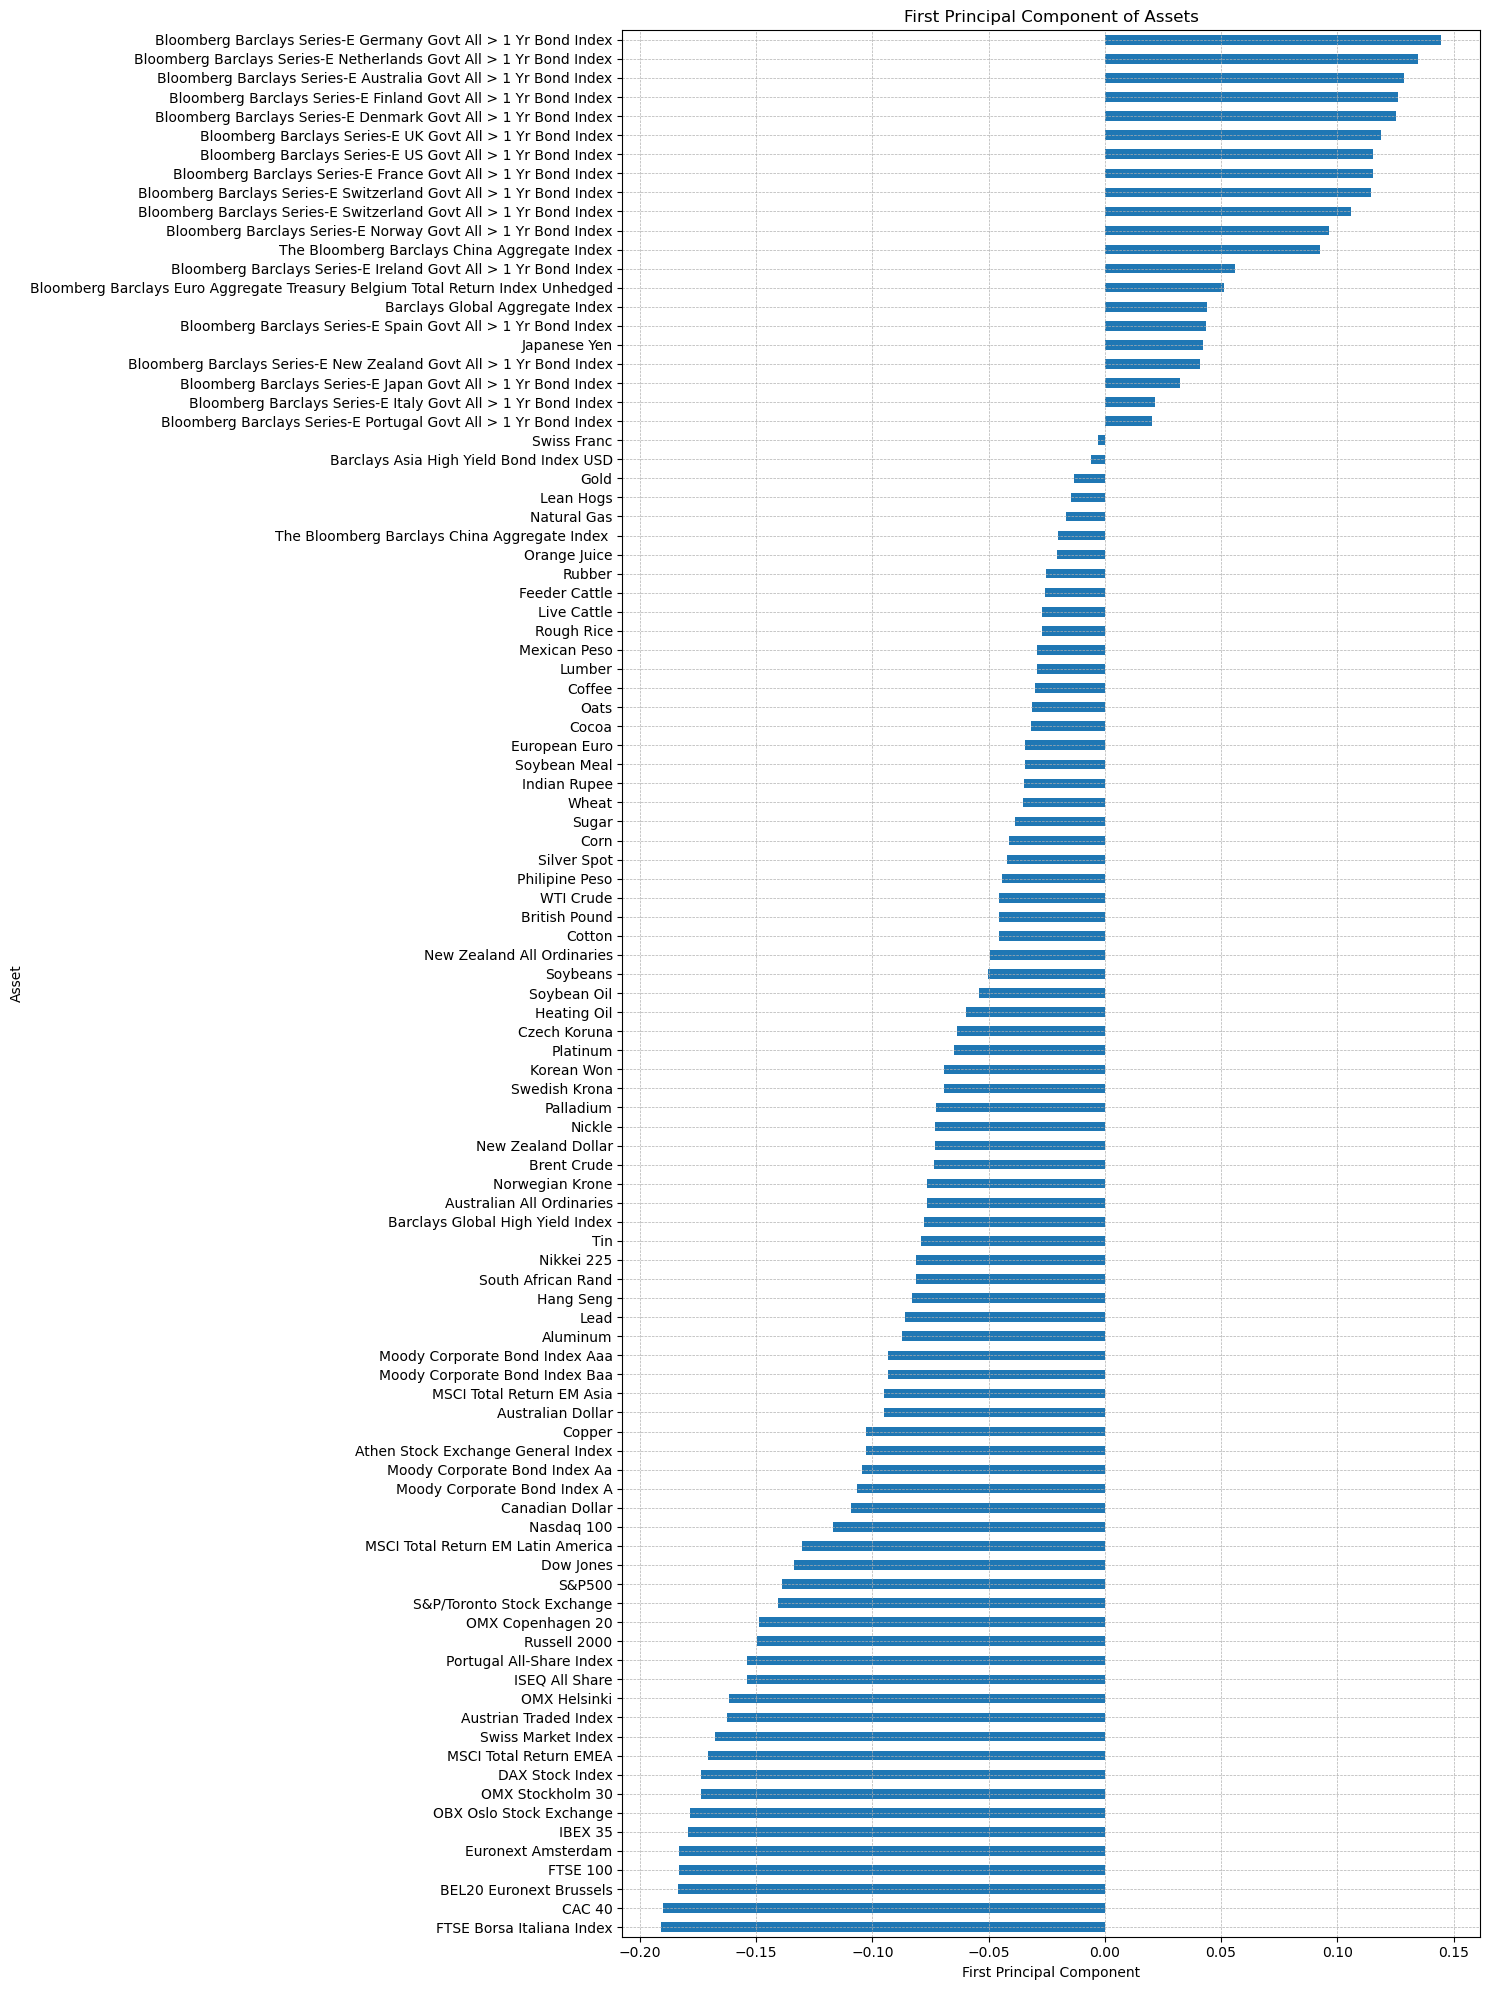

In [10]:
plt.figure(figsize=(15,20))
global_systematic_risk.sort_values().plot(kind='barh')
plt.title('First Principal Component of Assets')
plt.xlabel('First Principal Component')
plt.ylabel('Asset')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

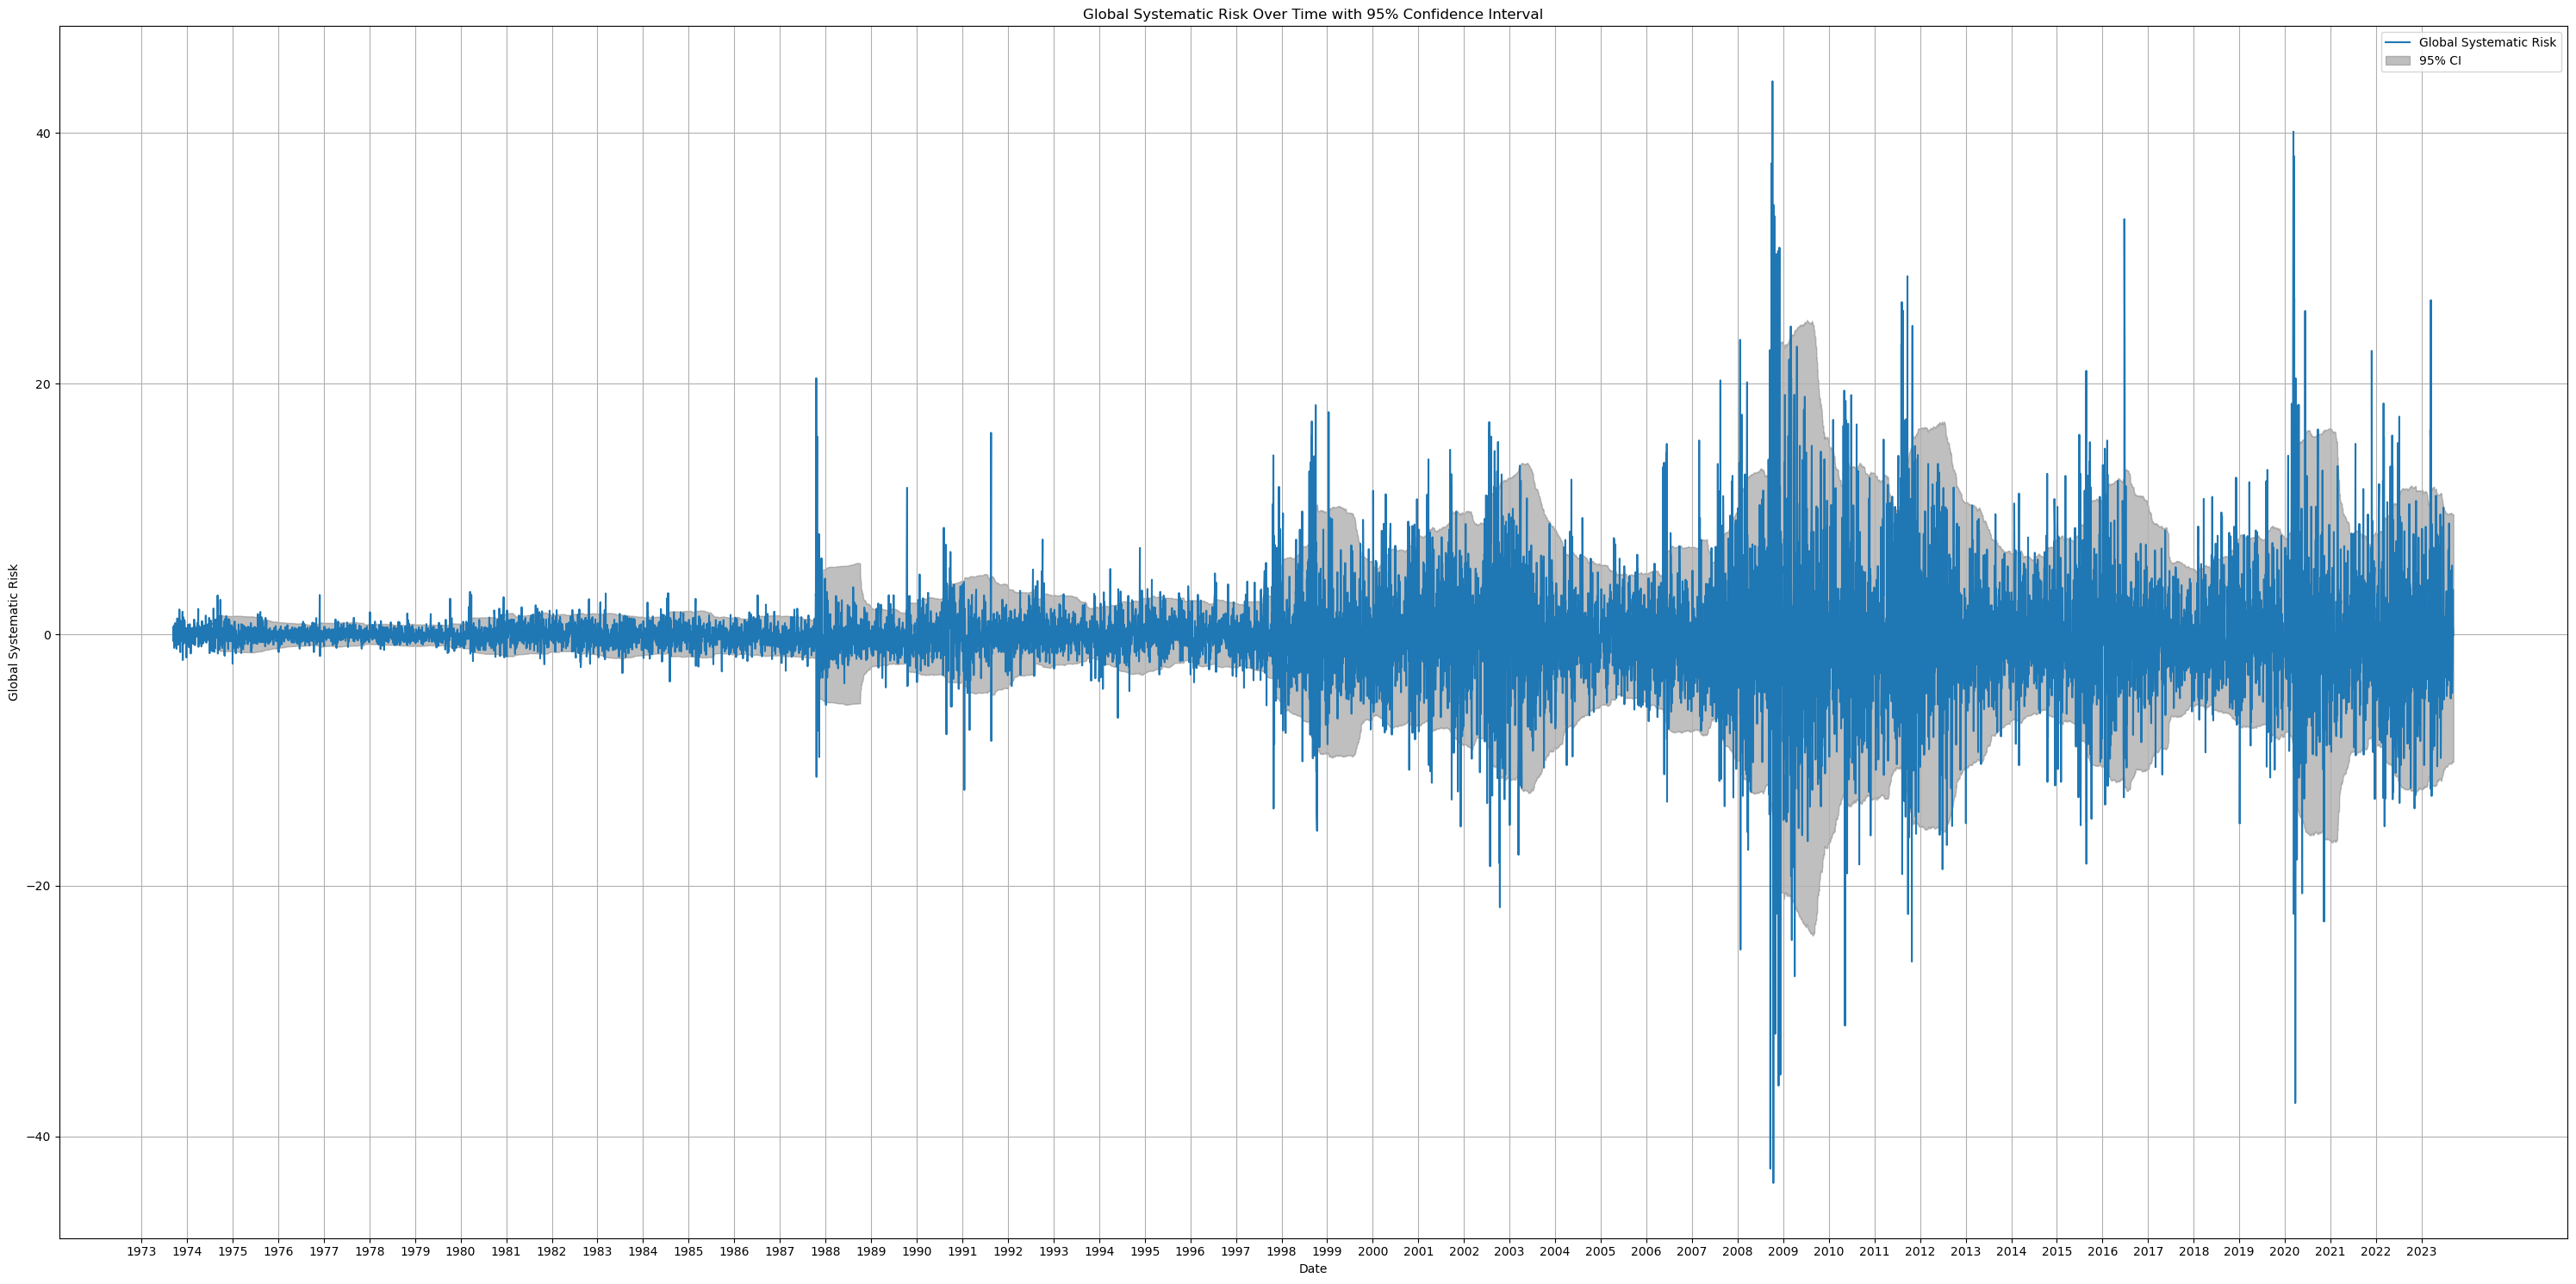

In [12]:
rolling_mean = pd.Series(global_systematic_risk_series).rolling(window=252).mean()
rolling_std = pd.Series(global_systematic_risk_series).rolling(window=252).std()

upper_bound = rolling_mean + 1.96 * rolling_std
lower_bound = rolling_mean - 1.96 * rolling_std

plt.figure(figsize=(30,15))
plt.plot(df.index, global_systematic_risk_series, label='Global Systematic Risk')
plt.fill_between(df.index, lower_bound, upper_bound, color='gray', alpha=0.5, label='95% CI')
plt.title('Global Systematic Risk Over Time with 95% Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Global Systematic Risk')

# Set major ticks and labels
unique_years = np.unique([date.year for date in df.index])
plt.xticks([str(year) + '-01-01' for year in unique_years], unique_years)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Clean Signal

In [13]:
import pywt
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(global_systematic_risk_series, model='additive', period=252)  # freq=252 for daily data assuming 252 trading days
deseasonalized = result.observed - result.seasonal

# apply wavelet transformation
#includes both the approximated (low frequency) and detailed (high frequency) parts of the series.
coeffs = pywt.wavedec(deseasonalized, 'db1', level=4)
cA4, cD4, cD3, cD2, cD1 = coeffs

# reconstructing without high frequency noise 
# reconstructed_signal = pywt.waverec([cA4, cD4, cD3, cD2, None], 'db1')
reconstructed_signal = pywt.waverec([cA4, cD4, None, None, None], 'db1')
reconstructed_signal = reconstructed_signal[:len(df)]


sma_252 = pd.Series(reconstructed_signal).rolling(window=252).mean()
ema_252 = pd.Series(reconstructed_signal).ewm(span=252).mean()
rolling_std = pd.Series(reconstructed_signal).rolling(window=252).std()

upper_bound = sma_252 + 1.96 * rolling_std
lower_bound = sma_252 - 1.96 * rolling_std

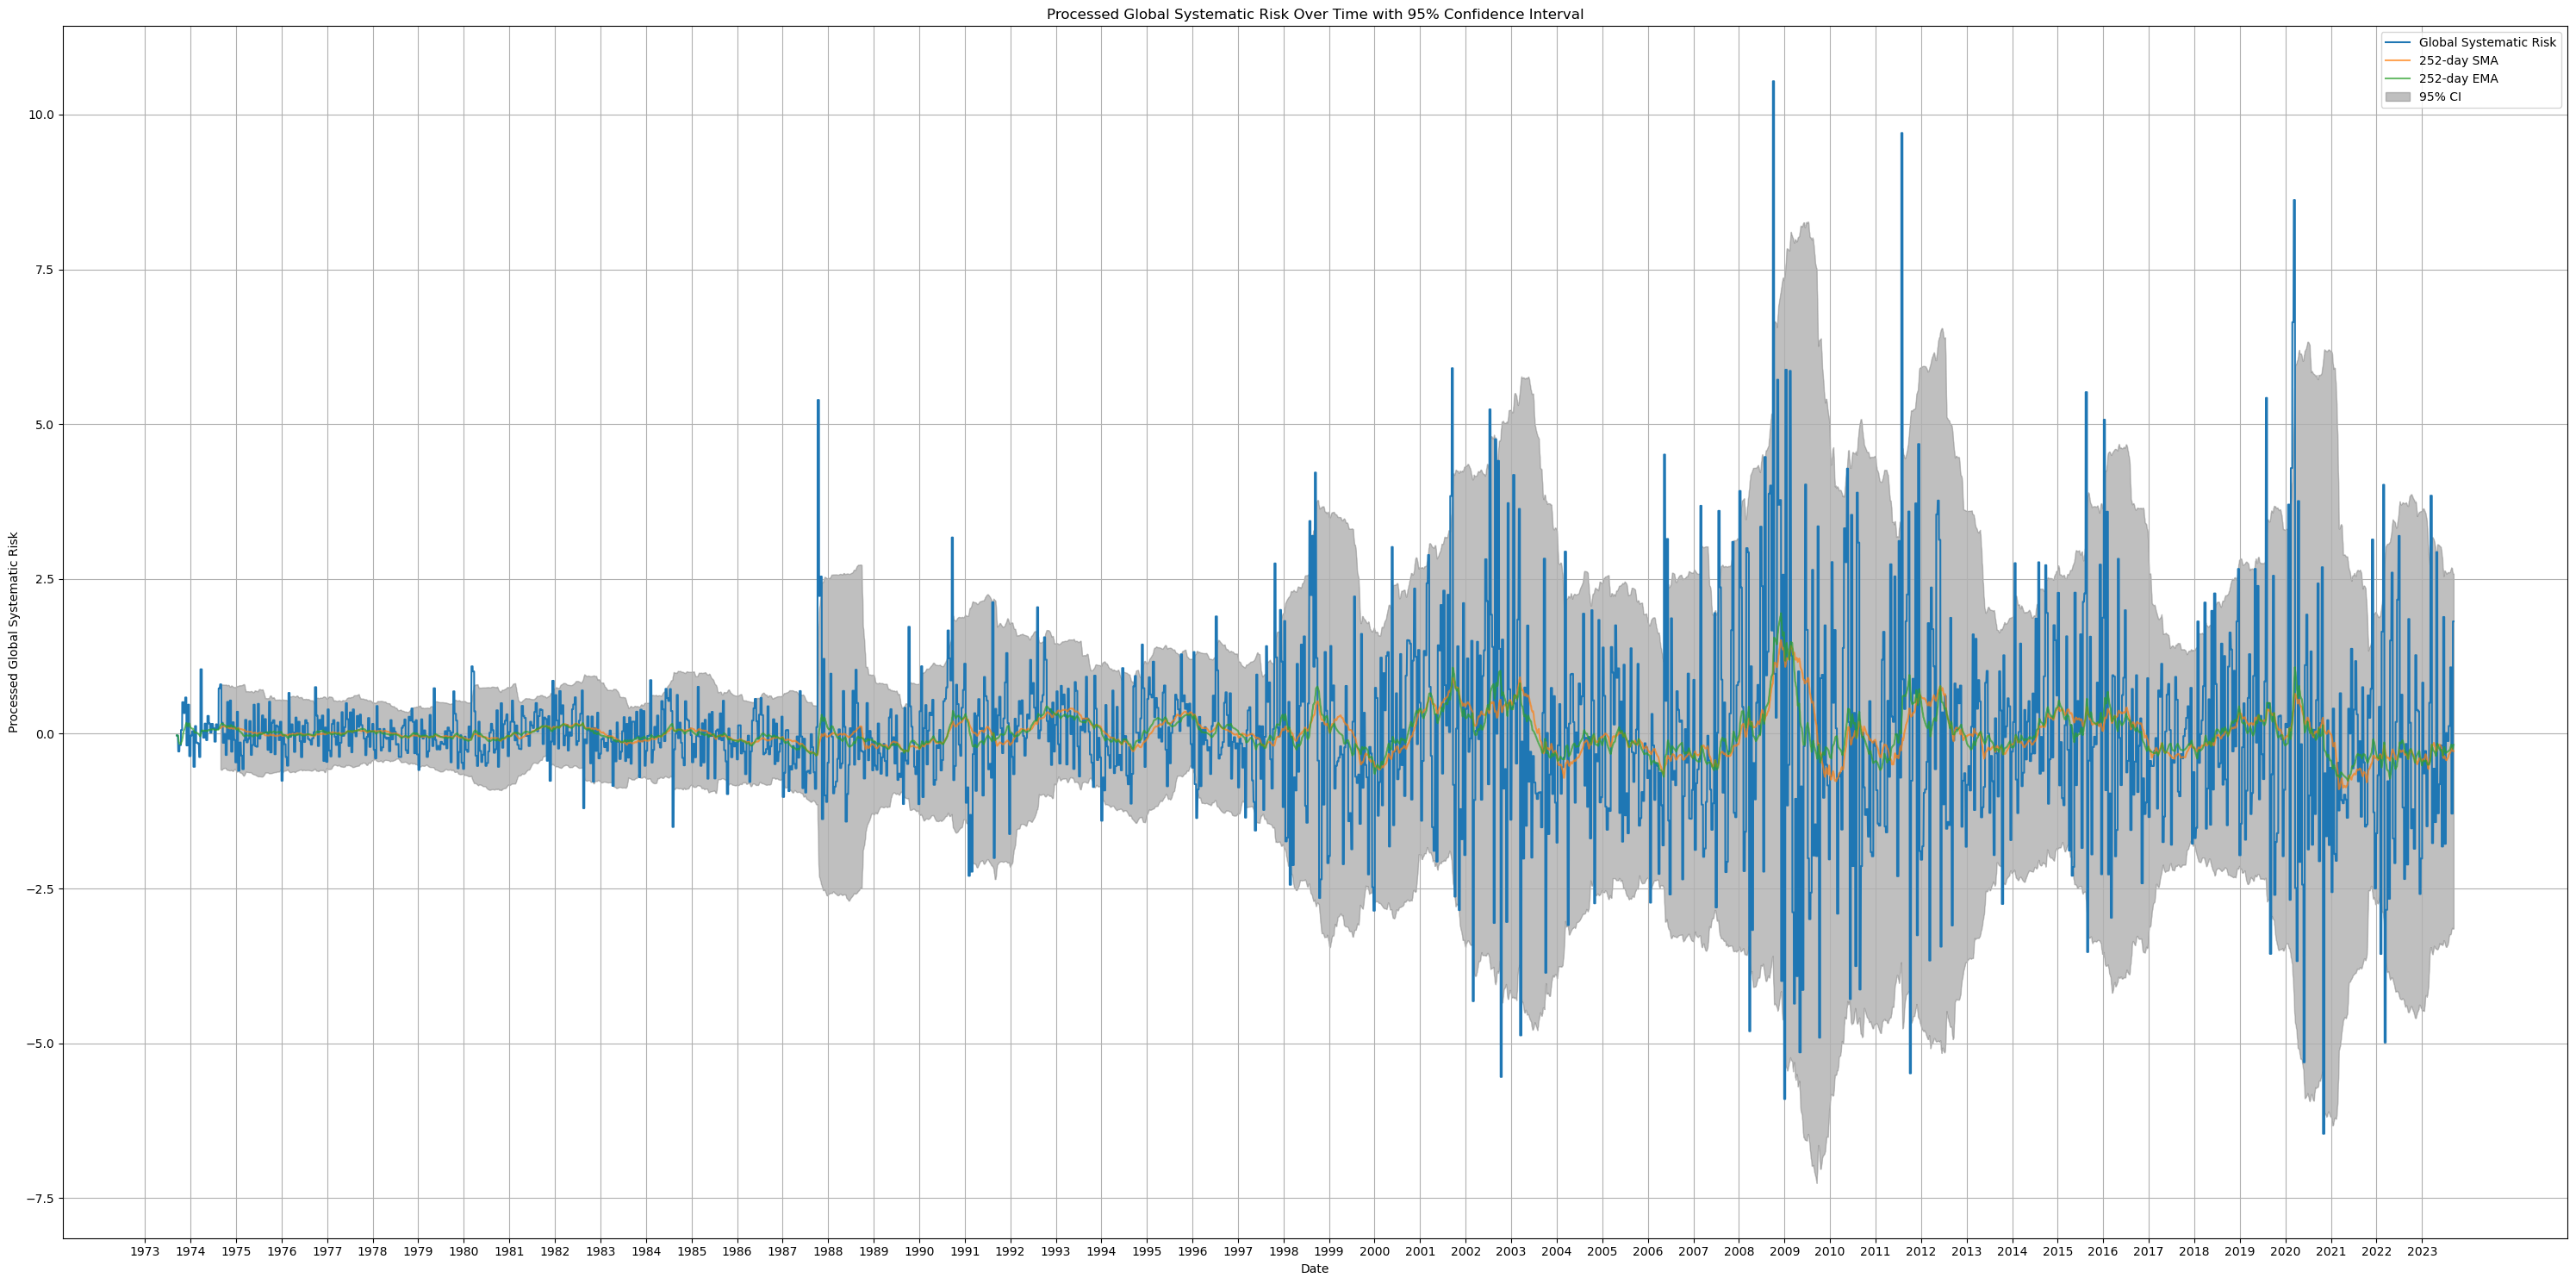

In [14]:
plt.figure(figsize=(30,15))
plt.plot(df.index, reconstructed_signal, label='Global Systematic Risk')
plt.plot(df.index, sma_252, label='252-day SMA', alpha=0.7)
plt.plot(df.index, ema_252, label='252-day EMA', alpha=0.7)
plt.fill_between(df.index, lower_bound, upper_bound, color='gray', alpha=0.5, label='95% CI')
plt.title('Processed Global Systematic Risk Over Time with 95% Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Processed Global Systematic Risk')

plt.xticks([str(year) + '-01-01' for year in unique_years], unique_years)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Assets in tandem with SPX

# correlation of top assets to referance assets

In [28]:
def plot_correlations_with_reference(returns_df, reference_asset='SPX Index', top_n=5):
    # Compute correlations with reference asset
    correlations = returns_df.corr()[reference_asset]

    # Get the top N positively correlated assets excluding the reference asset
    top_positive_correlated = correlations.sort_values(ascending=False).head(top_n + 1)[1:]

    # Get the top N last correlated assets
    top_least_correlated = correlations.abs().sort_values().head(top_n)

    # Combine for plotting
    all_correlated = pd.concat([top_positive_correlated, top_least_correlated])

    # Plot
    plt.figure(figsize=(10, 8))
    colors = ['green' if label in top_positive_correlated.index else 'red' for label in all_correlated.index]
    all_correlated.plot(kind='barh', color=colors)
    plt.axvline(0, color='black', linestyle='--')
    plt.title(f"Top {top_n} Correlated and Least-Correlated Assets with {reference_asset}")
    plt.xlabel('Correlation Coefficient')
    plt.ylabel('Asset')
    plt.savefig(f"result/{reference_asset}_corr.png")
    plt.show()




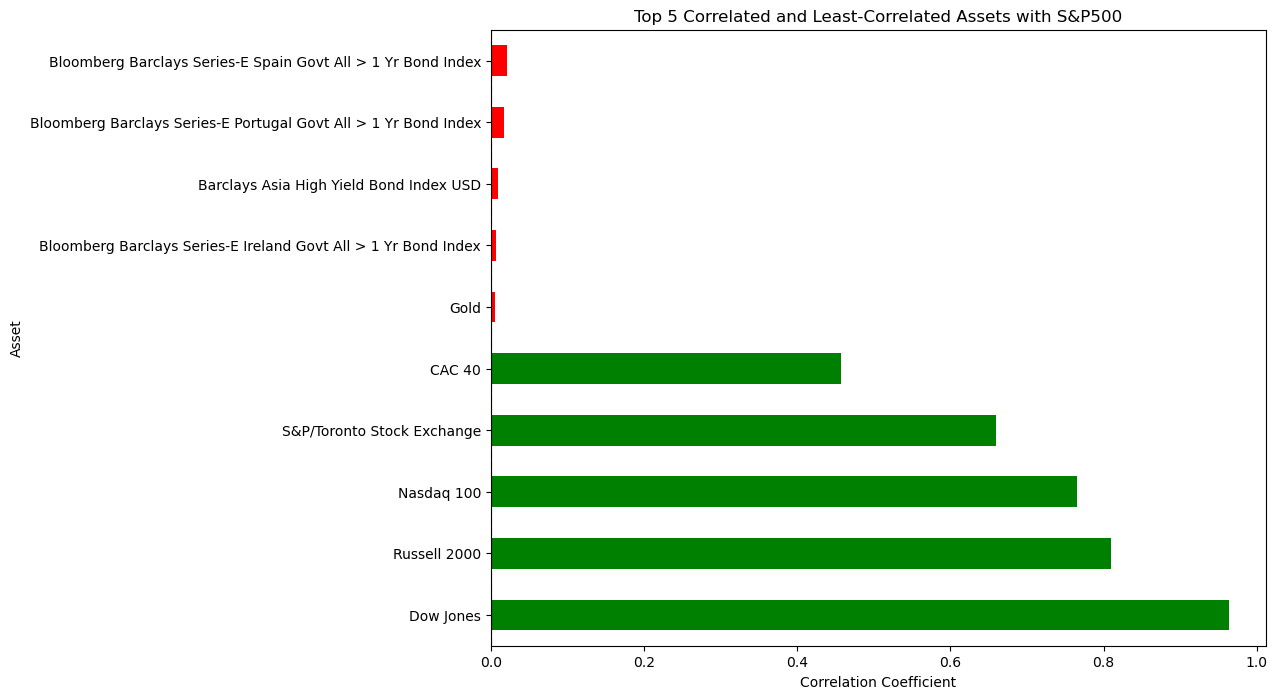

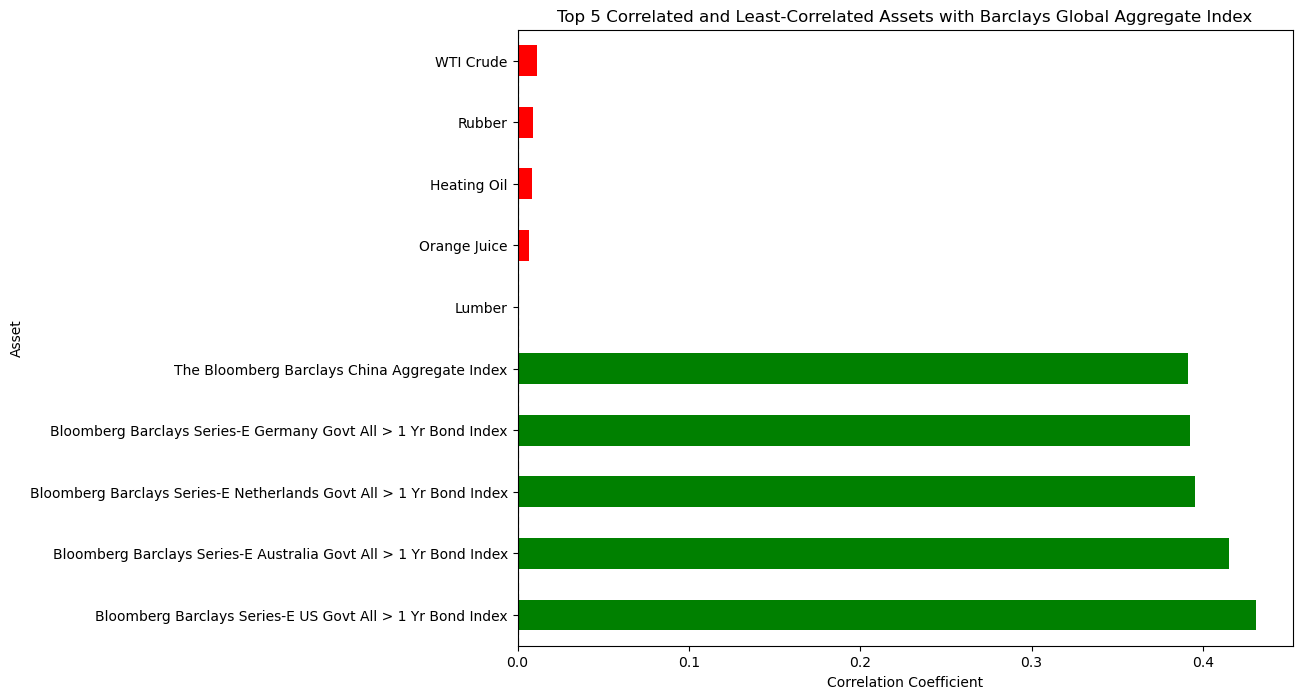

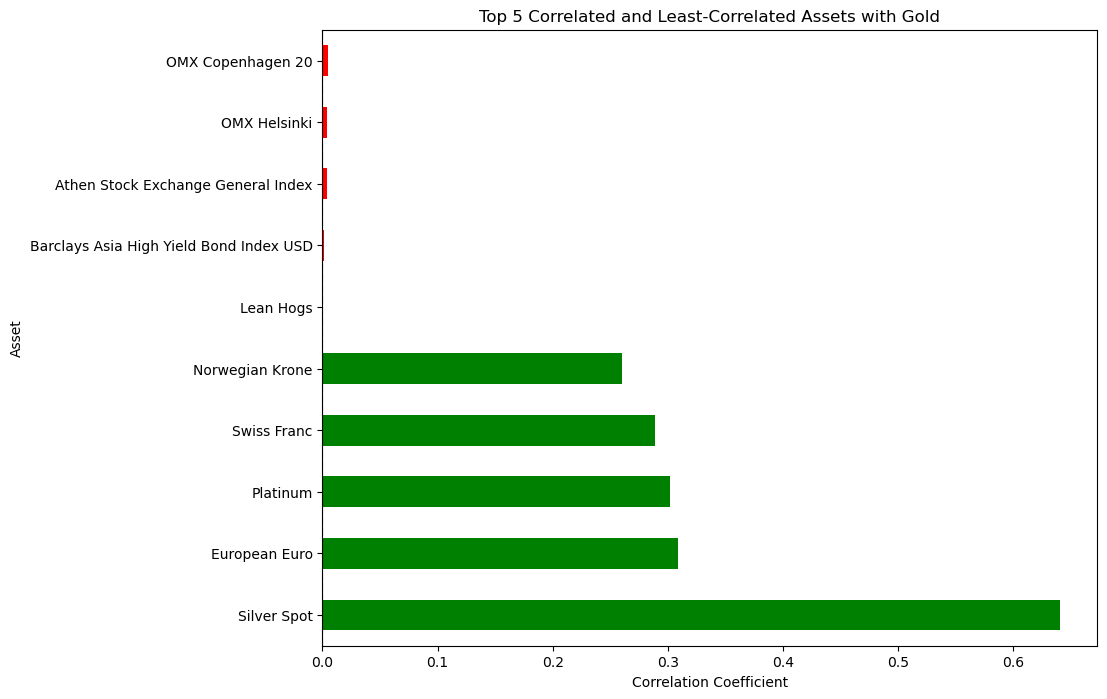

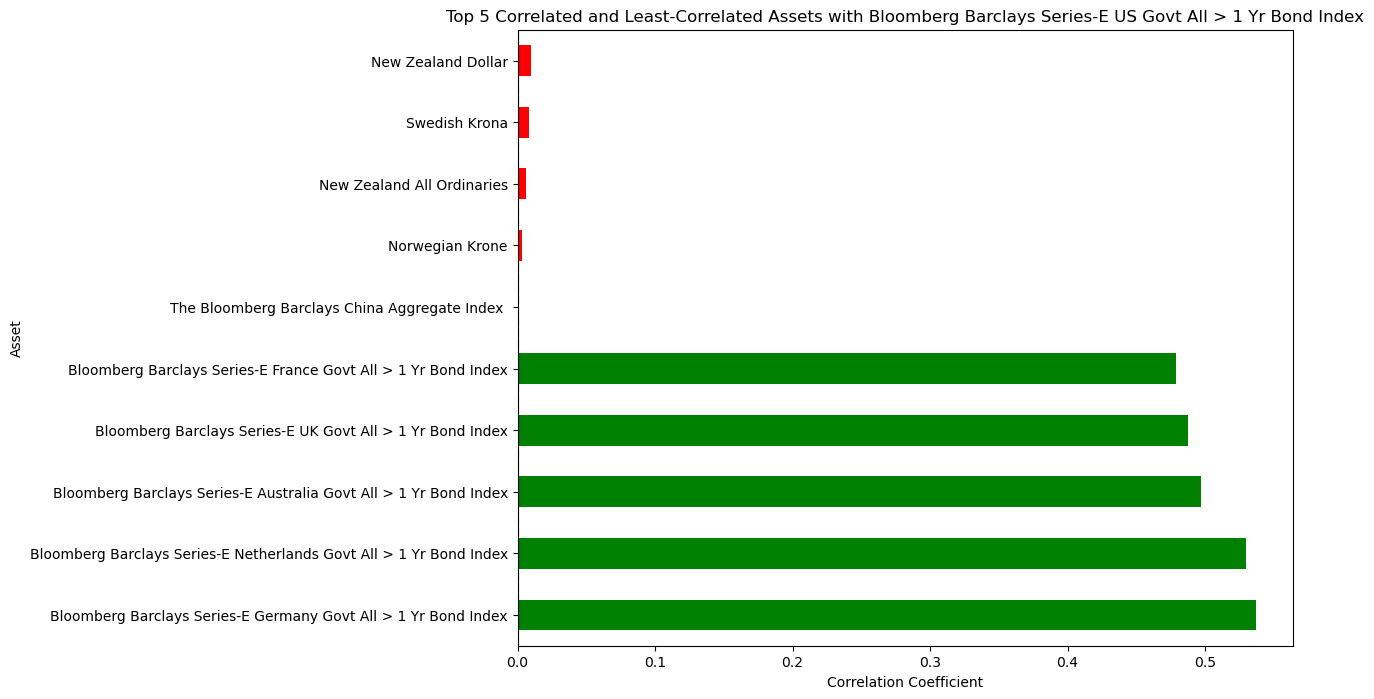

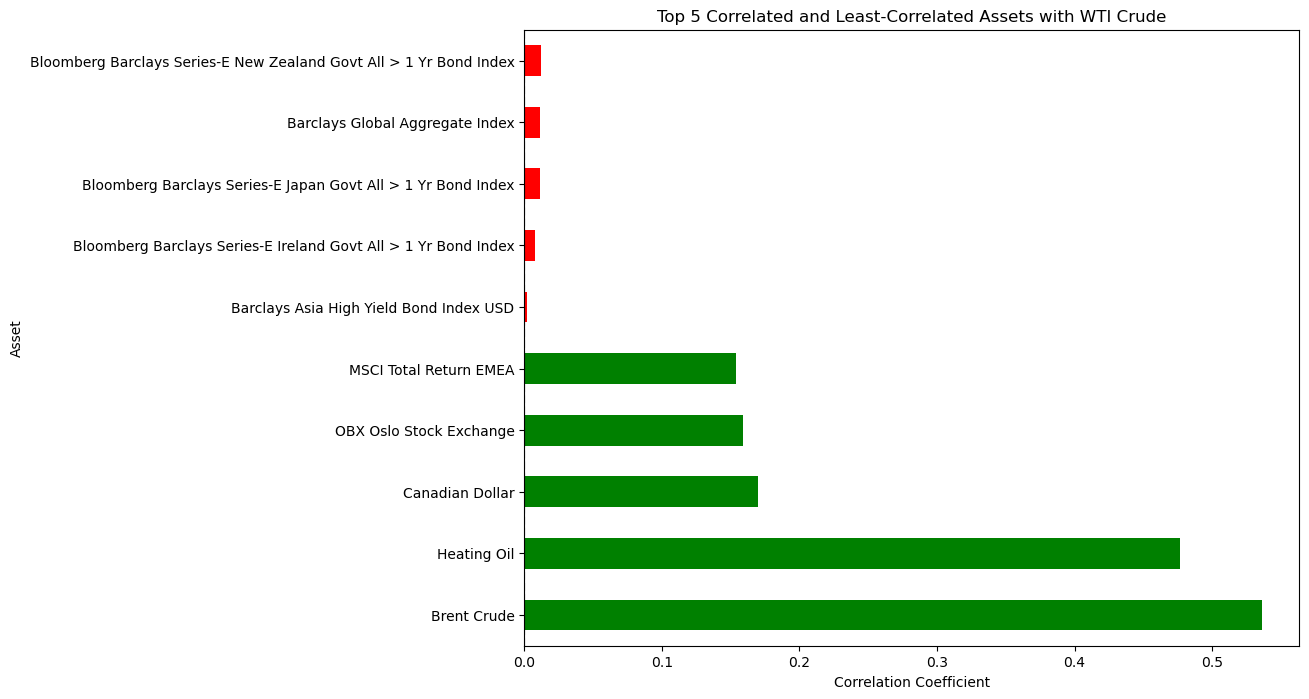

In [24]:
assets = ['SPX Index', 'LEGATRUU Index', 'XAU Curncy', 'BEUSGA Index', 'CL1 Comdty']
assets = [ticker_mapper[asset] for asset in assets]

for asset in assets:
    plot_correlations_with_reference(df, reference_asset=asset, top_n=5)

In [25]:
df = df[df.index.year >= 2019]

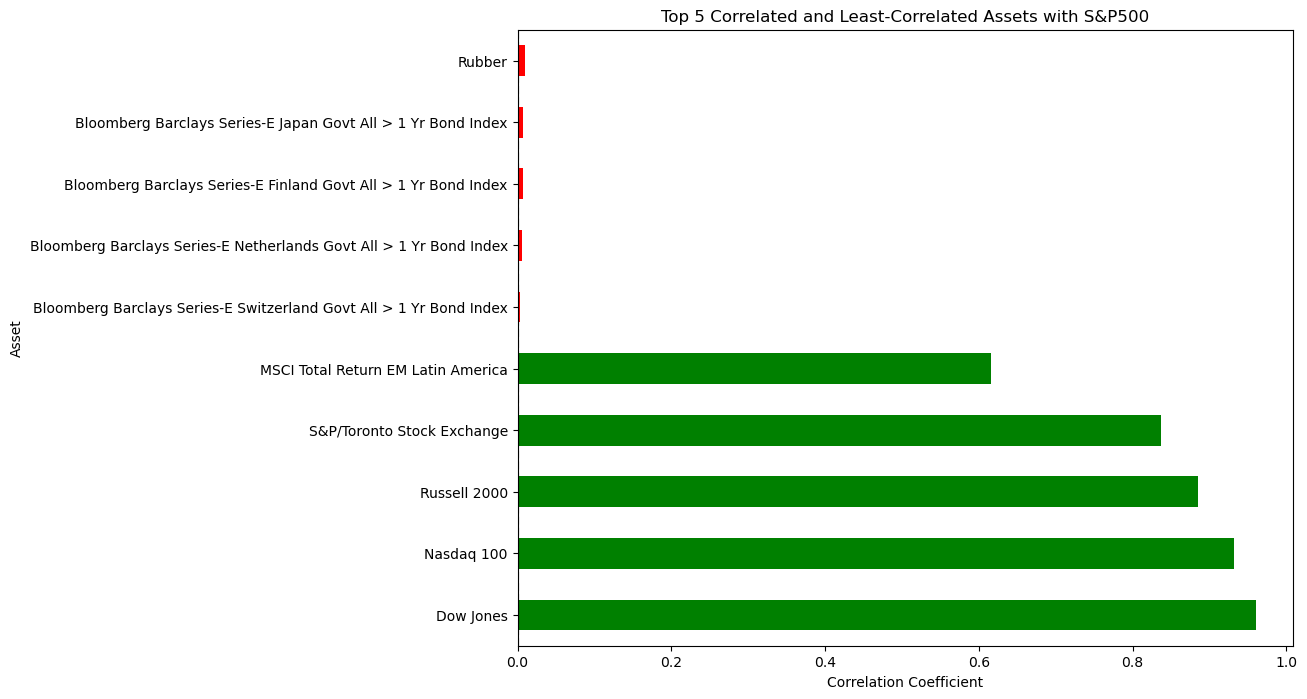

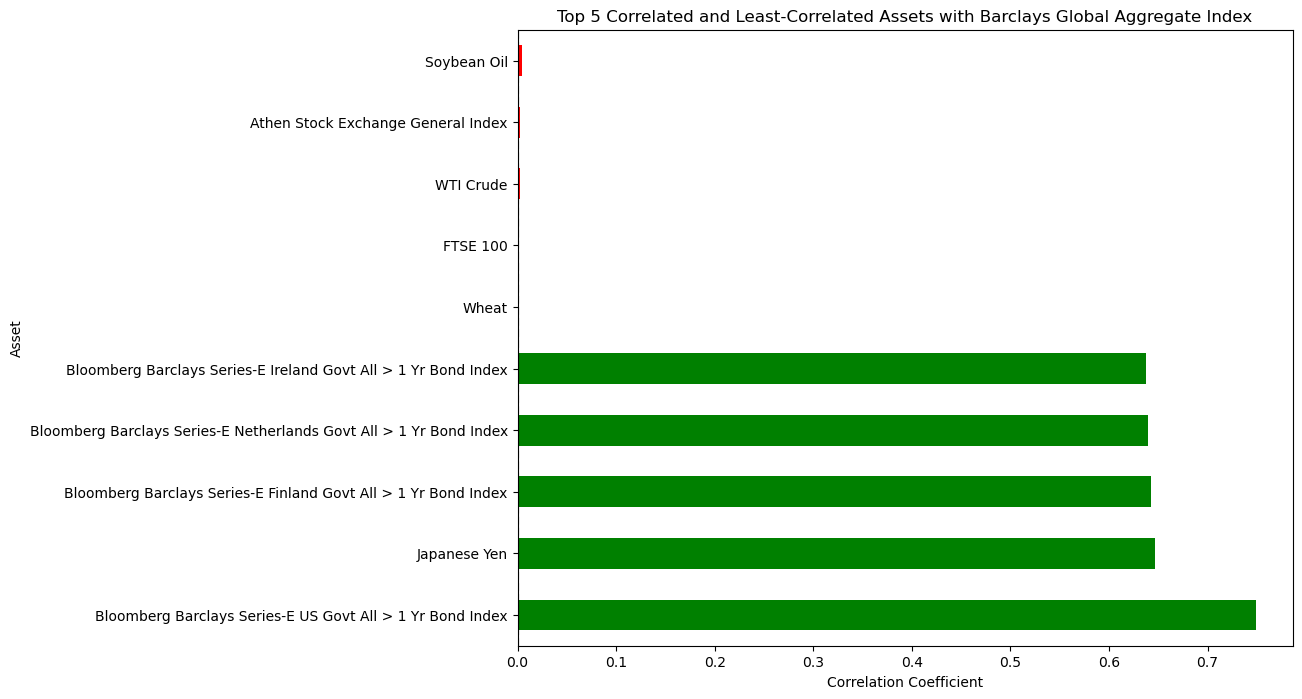

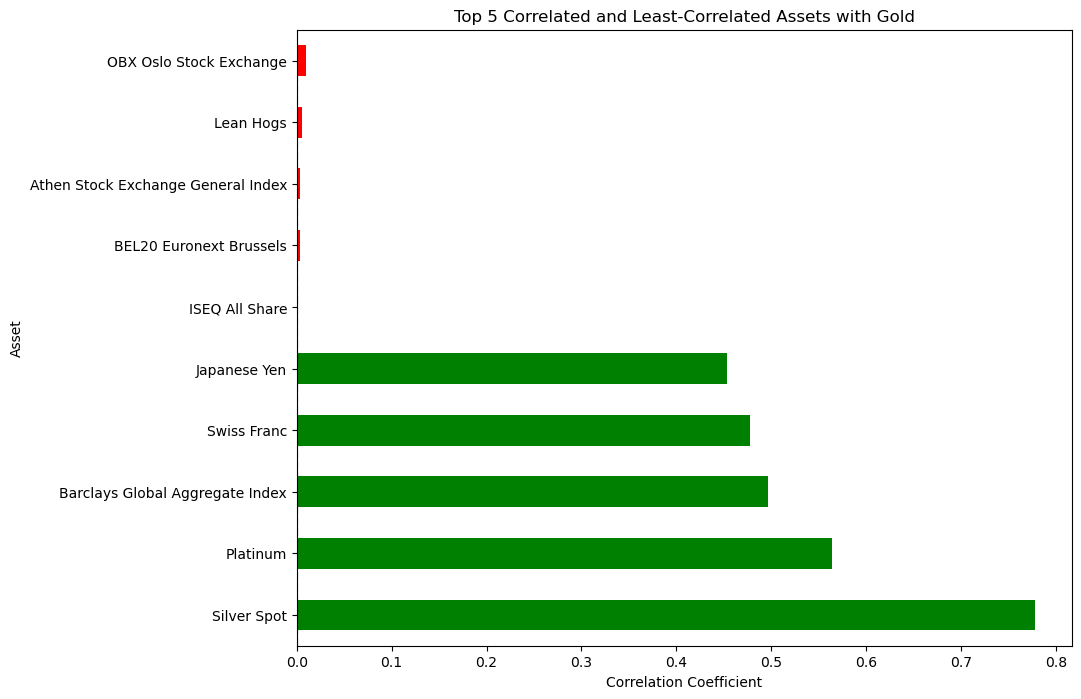

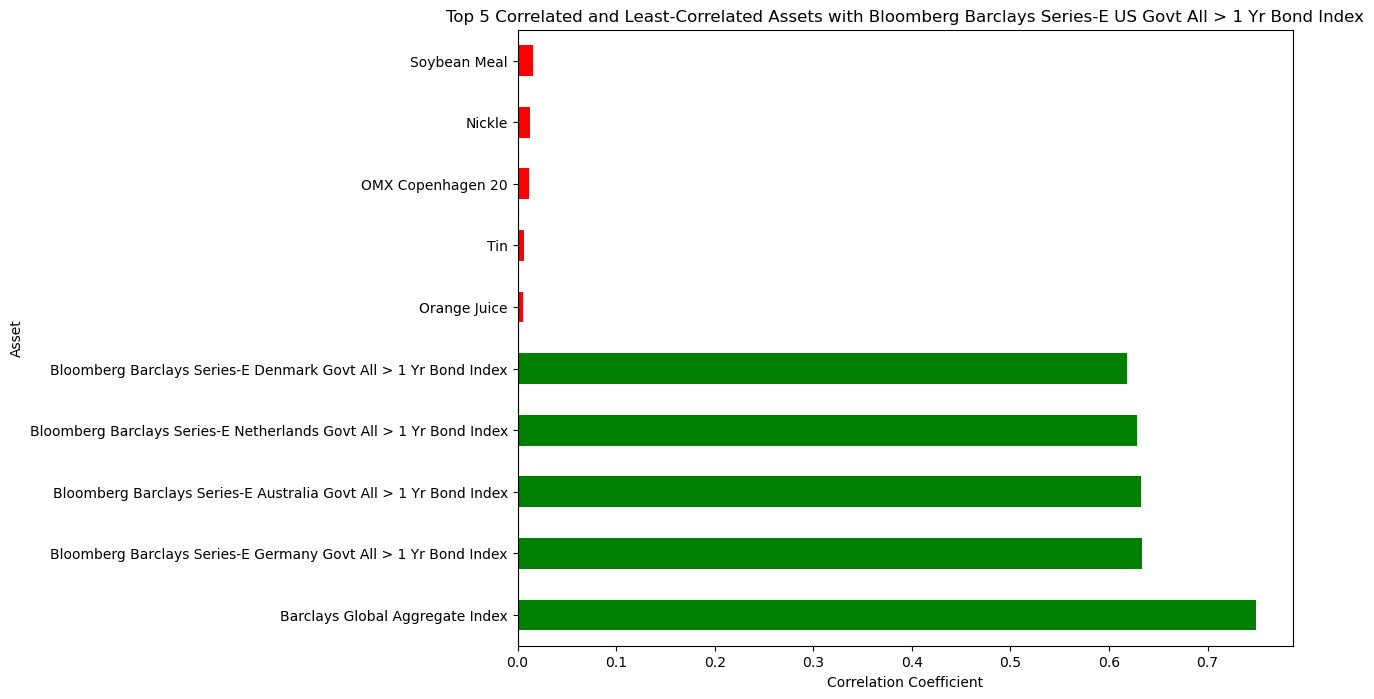

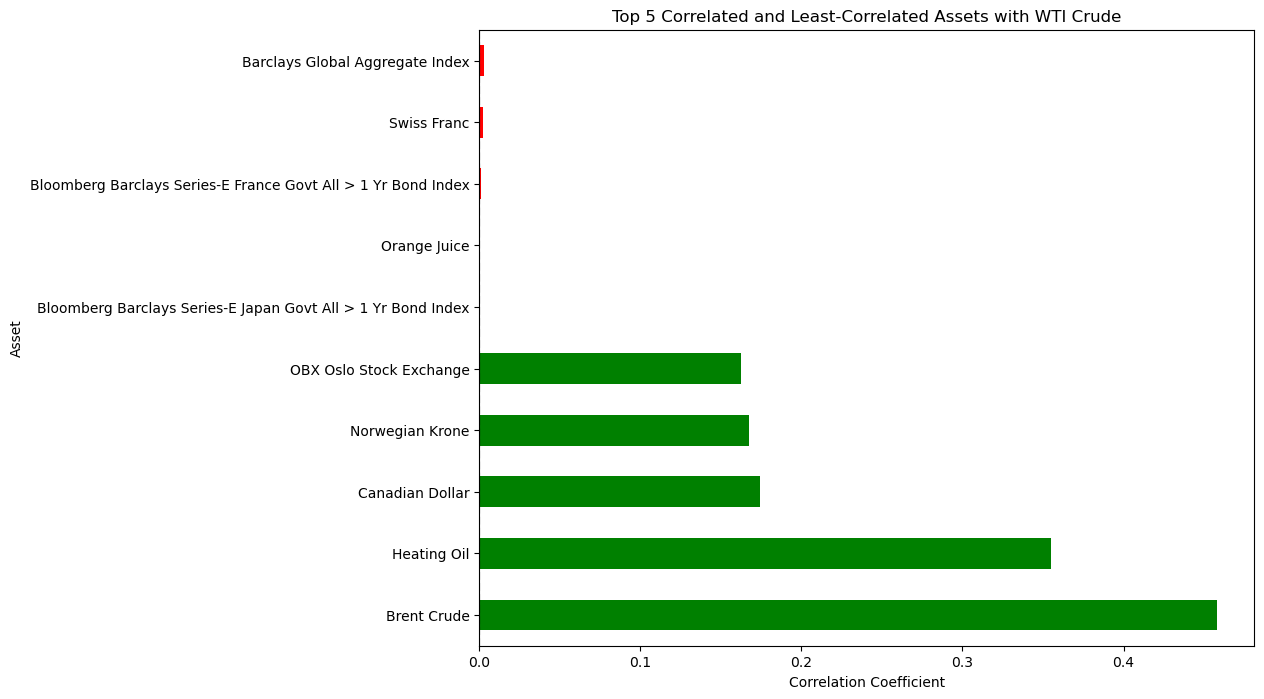

In [29]:
assets = ['SPX Index', 'LEGATRUU Index', 'XAU Curncy', 'BEUSGA Index', 'CL1 Comdty']
assets = [ticker_mapper[asset] for asset in assets]


for asset in assets:
    plot_correlations_with_reference(df, reference_asset=asset, top_n=5)